In [24]:
import numpy as np
import pandas as pd
import mygene
import omnipath as op
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import mellon as ml

In [25]:
gtex_link = 'https://storage.googleapis.com/gtex_analysis_v7/rna_seq_data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct.gz'
exp = pd.read_csv(gtex_link, sep='\t', index_col='gene_id', skiprows=2)
exp_cns = exp.loc[:, ['Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra']]
exp_cns = exp_cns.loc[(exp_cns > 0).any(axis=1)]

# import omnipath db
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]

# convert gtex gene names from ENSEMBL to gene symbols
mg = mygene.MyGeneInfo()
ensembl_gtex = list(np.unique(pd.DataFrame(list(exp_cns.index.str.split('.')))[0]))
symbols_gtex = mg.querymany(ensembl_gtex, scopes='ensembl.gene', fields='symbol', species='human')
symbols_gtex = pd.DataFrame(symbols_gtex)['symbol']

# Keep only ones that act as LRs



querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-32767...done.
Finished.
4 input query terms found dup hits:
	[('ENSG00000229425

In [26]:
symbols_gtex_format = symbols_gtex.rename('gene').to_frame().set_index('gene')
all_source, pctsrc, all_targets, pcttgt, summary_LR = ml.lr.find_hits(symbols_gtex_format,db) 
universe = list(summary_LR[summary_LR['source+target']!='None']['gene'])


LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

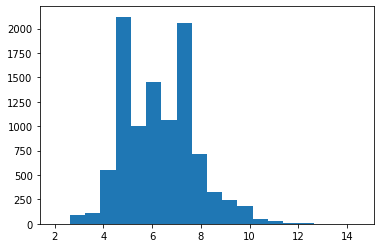

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

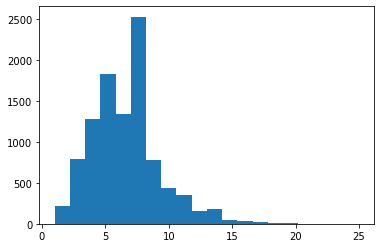

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

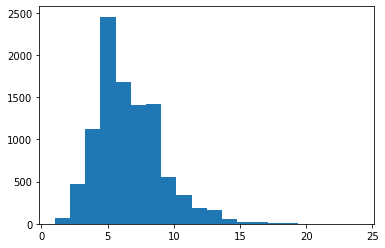

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

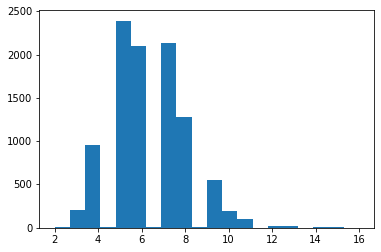

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

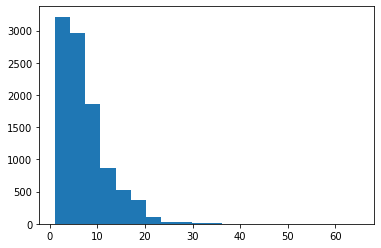

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

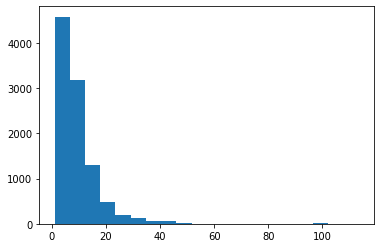

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

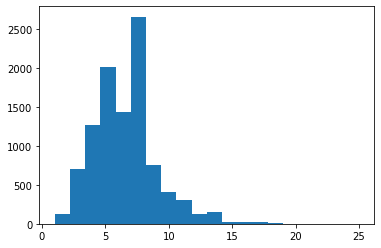

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

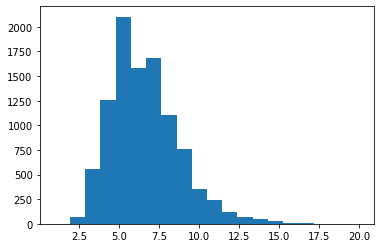

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

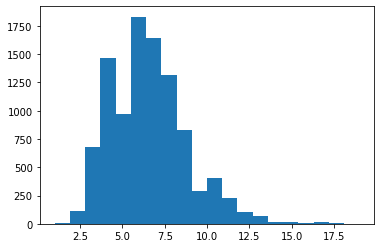

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

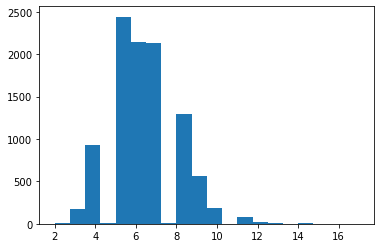

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

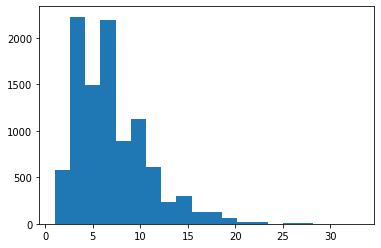

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

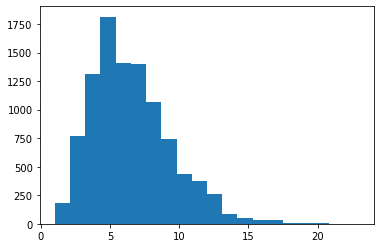

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

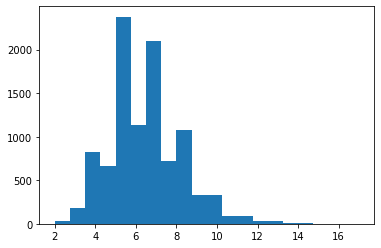

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

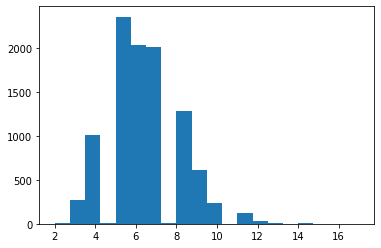

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.


c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.


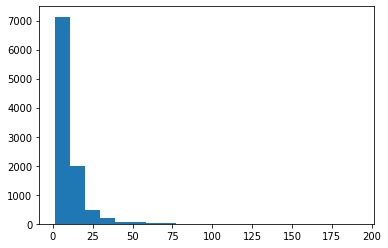

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

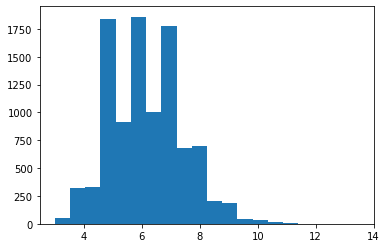

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

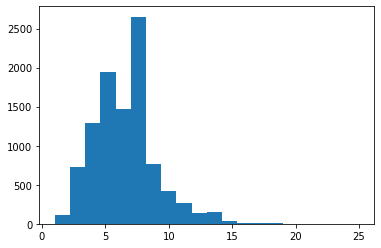

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

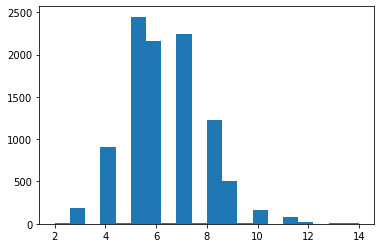

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

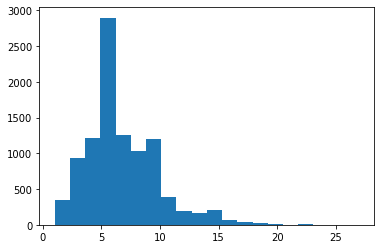

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

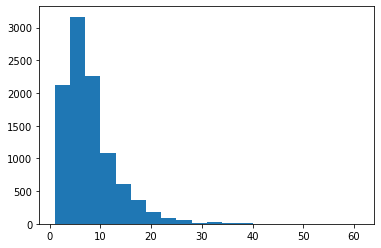

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

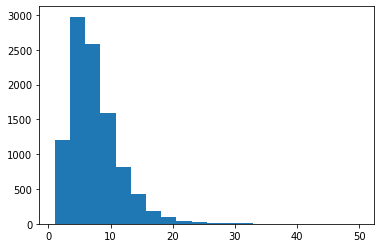

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

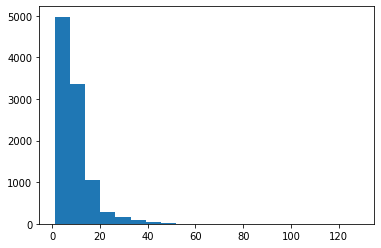

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

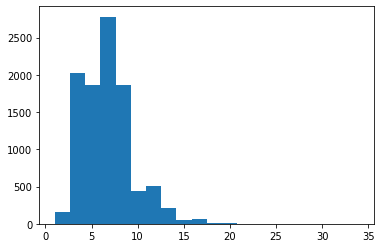

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

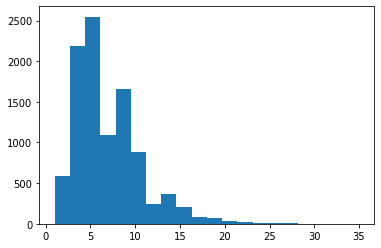

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

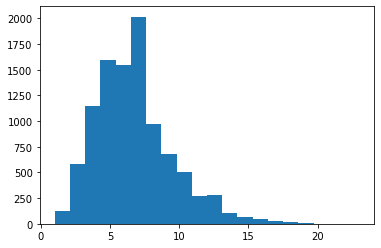

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

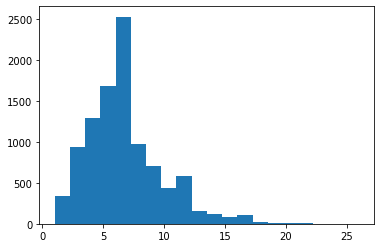

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

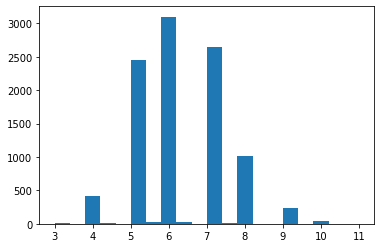

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

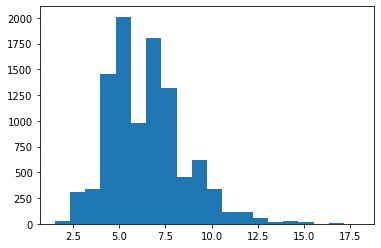

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

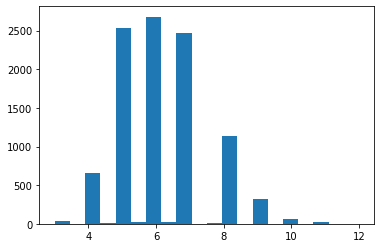

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

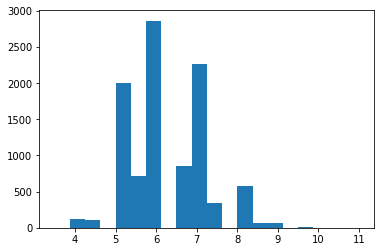

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

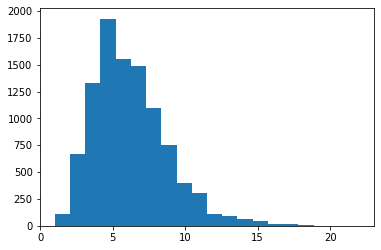

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

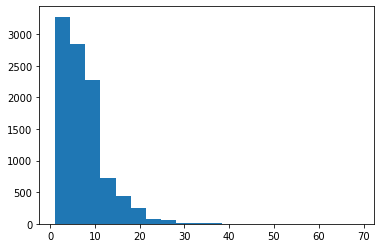

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

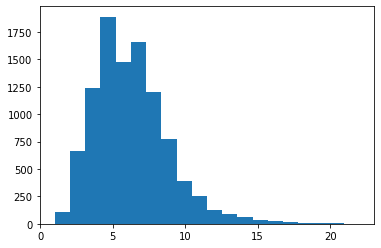

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.


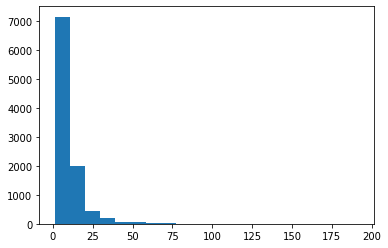

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

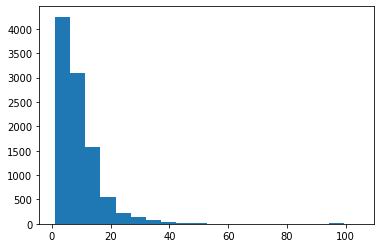

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

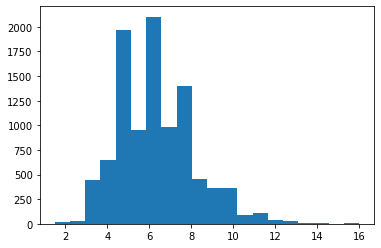

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

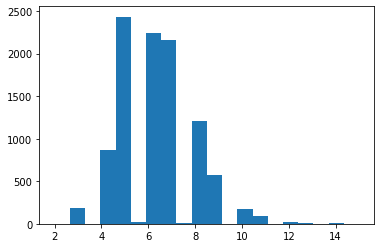

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

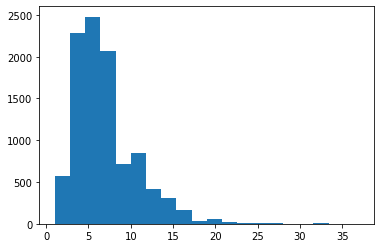

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

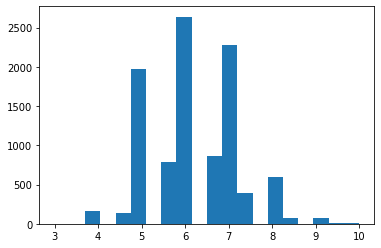

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

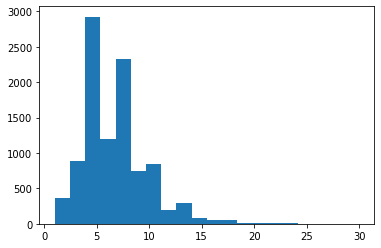

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

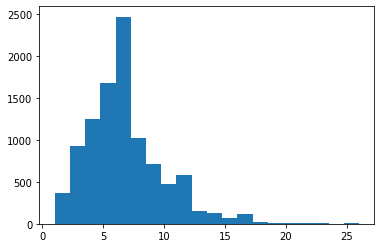

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

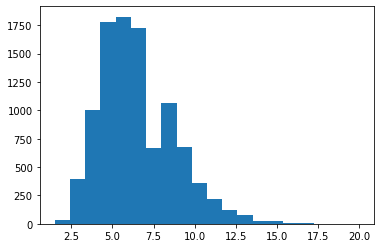

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

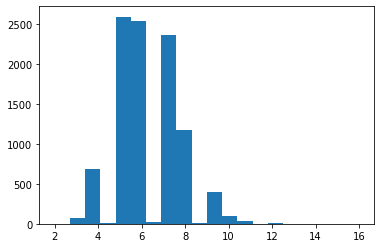

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

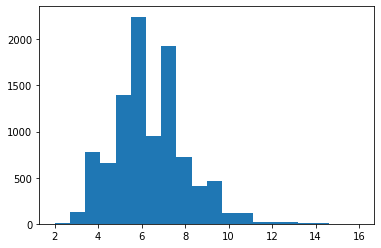

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

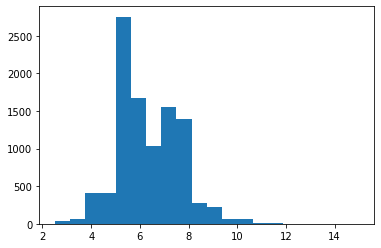

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

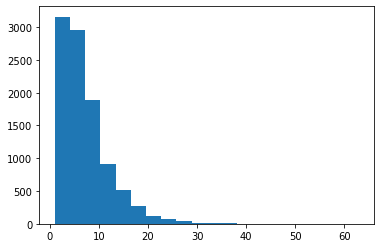

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

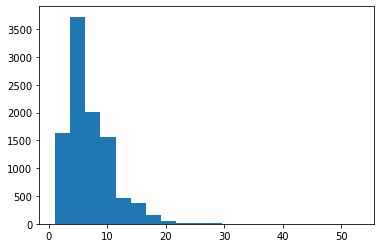

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

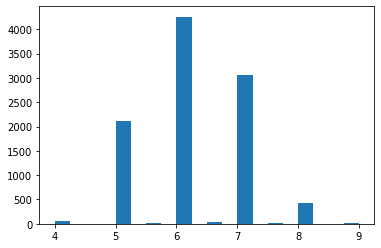

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

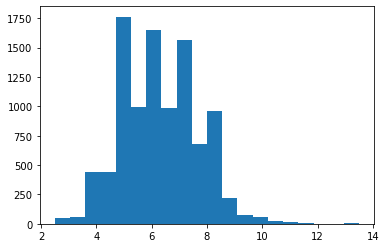

LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene from analysis.
LOC101059948  is not available in ENSEMBL. Excluding this gene f

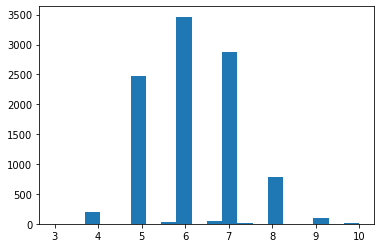

In [22]:
rng = [0.4, 0.7, 0.1]

for m in rng:
    #fetch disease risk list path
    path = glob.glob("/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/*.tsv")
    dis_list = []
    #iterate through each disease
    for n in range (0,len(path)):
        disease = glob.glob("/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/*.tsv")[n].split("\\")[1].split("_")[0]
        dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
        dis = dis[(dis['objectObject']>m)]
        # keep only diseases that, at this threshold, have 10 or more genetic associations
        if np.shape(dis)[0]>10:
            dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
            dis = dis[(dis['objectObject']>m)]
            if np.shape(dis)[0]>10:
                df = dis[(dis['objectObject']>m)]
                df['gene']=df.index
                df.reset_index(inplace = True)
                df = df.drop(columns=['symbol']).set_index(['gene'])
                # calculate the occurance of Ls and Rs in our disease data
                all_source, pctsrc, all_targets, pcttgt, summary_LR = ml.lr.find_hits(df,db)
                # keep list of unique genes that act as L and/or R, calculate number of transcript variants 
                LRs = list(summary_LR[summary_LR['source+target']!='None']['gene'])
                disease_med_var = ml.lr.total_variants_gene_list(LRs)
                # bootstrap random list of LRs expressed in the brain (minus targets), calculate number of transcript variants and store these in a list 
                vars = ml.lr.bootstrap_genes_return_variants(len(LRs), 10000, len(set(universe) - set(LRs)))

                plt.hist(vars, bins=20)
                plt.show()
                
                #We calculate the pval
                pval = np.sum(pd.DataFrame(vars)>disease_med_var)/len(vars)

                #vars_all_diseases.append(disease_med_var)
            dis_list.append(disease)

            if (n==0):
                all_disease_var = np.asarray(disease_med_var).reshape(1,-1)
                all_pval = pval
                
            else:    
                all_disease_var = np.concatenate((all_disease_var, np.asarray(disease_med_var).reshape(1,-1)), axis = 0)
                all_pval = np.concatenate((all_pval, pval), axis = 0)
    threshold = np.zeros_like(all_pval)
    threshold[:] = m

    # Store in a dataframe the disease name, number of transcripts (total or median per gene?) and the p-value
    
    results_df = pd.DataFrame(np.concatenate((np.asarray(dis_list).reshape(1,-1), all_disease_var.reshape(1,-1), all_pval.reshape(1,-1), threshold.reshape(1,-1)), axis = 0).T, columns = ['Disease', 'Median transcript variants', 'pval', 'Threshold'])
    if m == rng[0]:
        all_results_df = results_df

    else:
        all_results_df = pd.concat([all_results_df, results_df], axis = 0)

all_results_df.to_csv('processed_data/06a_splicing_disease_LRs/significance_splicing_disease.csv', index = False)

In [28]:
    m=0.7
    path = glob.glob("raw_data/PD_MONDO_0005180-associated-diseases (1).tsv")
    dis_list = []
    #iterate through each disease
    for n in range (0,len(path)):
        disease = 'PD'
        dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
        dis = dis[(dis['objectObject']>m)]
        # keep only diseases that, at this threshold, have 10 or more genetic associations
        if np.shape(dis)[0]>10:
            dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
            dis = dis[(dis['objectObject']>m)]
            if np.shape(dis)[0]>10:
                df = dis[(dis['objectObject']>m)]
                df['gene']=df.index
                df.reset_index(inplace = True)
                df = df.drop(columns=['symbol']).set_index(['gene'])
                # calculate the occurance of Ls and Rs in our disease data
                all_source, pctsrc, all_targets, pcttgt, summary_LR = ml.lr.find_hits(df,db)
                # keep list of unique genes that act as L and/or R, calculate number of transcript variants 
                LRs = list(summary_LR[summary_LR['source+target']!='None']['gene'])
                disease_med_var = ml.lr.total_variants_gene_list(LRs)
    genelist = LRs    
    import random
    import mellon as ml
    import pyensembl
    import numpy as np

    ensembl = pyensembl.EnsemblRelease(release=109)
    total_transcripts = []
    for eachgene in genelist:
        try:
            total_transcripts.append(len(ensembl.transcript_ids_of_gene_name(eachgene)))
        except:
            print(eachgene, ' is not available in ENSEMBL. Excluding this gene from analysis.')
            continue
    np.median(total_transcripts)
    final_df = pd.DataFrame(
        {'gene_name': LRs,
        'number_transcripts': total_transcripts})
    final_df.sort_values(by = ['number_transcripts'], ascending = False)

,gene_name,number_transcripts
2,ATM,53
3,PLA2G6,39
1,MAPT,30
0,SNCA,17
4,STK39,4


1958

In [21]:
list(summary_LR[summary_LR['source+target']!='None']['gene'])

['SNCA', 'MAPT', 'ATM', 'PLA2G6', 'STK39']

In [37]:
len(universe)

1963